<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Punjab/bjpPunjab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 580 (delta 72), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (580/580), 28.52 MiB | 8.02 MiB/s, done.
Resolving deltas: 100% (239/239), done.


In [2]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"bjp punjab"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('bjp_punjab.csv',index = False)

Streaming output truncated to the last 5000 lines.
<--------------------------------------------------->
309
2020-11-17 09:19:45
1328628885869608961
False
@INCIndia @rohanrgupta We Congress followers learned the Desh Bhagti from Shere Punjab Lala Lajpat Rai ji whereas the bhagat's of BJP are learning from  treater Godse.
PremBakshi10

Twitter for Android
0
3
15
0
<--------------------------------------------------->
310
2020-11-17 09:14:39
1328627599422017536
False
https://t.co/ugLV6Rje5y . Since they have made it official, it’s an uphill task for @INCPunjab as it will be against 3 parties with basically the same objective. All these 3 parties @BJP4India + @Akali_Dal_ + @aap and not to forget @Mayawati will be aligning together only
lemmebwhtim

Twitter for iPhone
0
118
738
0
<--------------------------------------------------->
311
2020-11-17 09:13:21
1328627273382162433
True
With policies like Demonetisation &amp; GST, BJP emptied citizens' pockets.

Now with anti-farmer laws &amp; t

In [3]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       647 non-null    datetime64[ns]
 1   Tweet_id   647 non-null    int64         
 2   Verified   647 non-null    bool          
 3   Tweet      647 non-null    object        
 4   User       647 non-null    object        
 5   Location   647 non-null    object        
 6   Source     647 non-null    object        
 7   Likes      647 non-null    int64         
 8   Followers  647 non-null    int64         
 9   Following  647 non-null    int64         
 10  Retweets   647 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 51.3+ KB


In [5]:
df.shape

(647, 11)

In [6]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [7]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [8]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [9]:
df['Source'].value_counts()

Twitter for Android       376
Twitter Web App           142
Twitter for iPhone         70
TweetDeck                  18
IFTTT                       6
cmssocialservice            5
WordPress.com               4
Twitter for iPad            4
Hootsuite Inc.              4
Twitter Media Studio        3
Rajneeti News               2
PB Update                   2
indtoday                    1
tvpunjab                    1
News Flash Rajasthan        1
SocialFlow                  1
BJP Party                   1
dlvr.it                     1
Devdiscourse News Desk      1
Twitter for Mac             1
IAmPunjab Twitter           1
NDTVfeed                    1
ht-twitter-handler          1
Name: Source, dtype: int64

In [10]:
df['Location'].nunique()

209

In [11]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

647

In [15]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


633

In [16]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [17]:
df['Tweet'].duplicated().sum()

14

In [18]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(633, 11)

In [19]:
df['Tweet'].duplicated().sum()

0

In [20]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [21]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [22]:
df.shape

(633, 12)

In [23]:
df['Processed_Tweet']

0      BJP ‘Non-entity’ in Punjab, Says CM Amarinder ...
1      @BJP4India is only a heavy duty &amp; hard wor...
2      Divorce with ally was a smart move https://t.c...
3      If the present morbidity on Congress continues...
4      @Mohit_ksr @moronhumor How about Thoko Taali k...
                             ...                        
628    @jadenyukichandr What is mistake of kejriwal i...
629    @jadenyukichandr 50k crore is for school, sala...
630    @Singh2639 @Shehzad_Ind Rajasthan- every 5 yea...
631    A Central Act shall be passed to ban  burning ...
632    @zereraz @ANI Unfortunately I think for many p...
Name: Processed_Tweet, Length: 633, dtype: object

In [24]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      BJP ‘Non-entity’ in Punjab, Says CM Amarinder ...
1      @BJP4India is only a heavy duty &amp; hard wor...
2      Divorce with ally was a smart move https://t.c...
3      If the present morbidity on Congress continues...
4      @Mohit_ksr @moronhumor How about Thoko Taali k...
                             ...                        
628    @jadenyukichandr What is mistake of kejriwal i...
629    @jadenyukichandr 50k crore is for school, sala...
630    @Singh2639 @Shehzad_Ind Rajasthan- every 5 yea...
631    A Central Act shall be passed to ban  burning ...
632    @zereraz @ANI Unfortunately I think for many p...
Name: Processed_Tweet, Length: 633, dtype: object

In [25]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0      BJP ‘Non-entity’ in Punjab, Says CM Amarinder ...
1        is only a heavy duty &amp; hard working #ele...
2      Divorce with ally was a smart move https://t.c...
3      If the present morbidity on Congress continues...
4          How about Thoko Taali khopdi Khali ?\n\n1)...
                             ...                        
628      What is mistake of kejriwal if Punjab and Ha...
629      50k crore is for school, salaries, from deve...
630        Rajasthan- every 5 years Govt changes.\nMP...
631    A Central Act shall be passed to ban  burning ...
632        Unfortunately I think for many people it h...
Name: Processed_Tweet, Length: 633, dtype: object

In [26]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0      BJP ‘Non-entity’ in Punjab, Says CM Amarinder ...
1        is only a heavy duty &amp; hard working #ele...
2                    Divorce with ally was a smart move 
3      If the present morbidity on Congress continues...
4          How about Thoko Taali khopdi Khali ?\n\n1)...
                             ...                        
628      What is mistake of kejriwal if Punjab and Ha...
629      50k crore is for school, salaries, from deve...
630        Rajasthan- every 5 years Govt changes.\nMP...
631    A Central Act shall be passed to ban  burning ...
632        Unfortunately I think for many people it h...
Name: Processed_Tweet, Length: 633, dtype: object

In [27]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0      BJP ‘Non-entity’ in Punjab, Says CM Amarinder ...
1        is only a heavy duty &amp; hard working elec...
2                    Divorce with ally was a smart move 
3      If the present morbidity on Congress continues...
4          How about Thoko Taali khopdi Khali ?\n\n1)...
                             ...                        
628      What is mistake of kejriwal if Punjab and Ha...
629      50k crore is for school, salaries, from deve...
630        Rajasthan- every 5 years Govt changes.\nMP...
631    A Central Act shall be passed to ban  burning ...
632        Unfortunately I think for many people it h...
Name: Processed_Tweet, Length: 633, dtype: object

In [28]:
!pip install tweet-preprocessor

In [29]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0       BJP Non-entity in Punjab, Says CM AmarinderSingh
1      is only a heavy duty &amp; hard working electi...
2                     Divorce with ally was a smart move
3      If the present morbidity on Congress continues...
4      How about Thoko Taali khopdi Khali ?1)He laugh...
                             ...                        
628    What is mistake of kejriwal if Punjab and Hary...
629    k crore is for school, salaries, from developm...
630    Rajasthan- every years Govt changes.MP - Lied ...
631    A Central Act shall be passed to ban burning o...
632    Unfortunately I think for many people it has b...
Name: Processed_Tweet, Length: 633, dtype: object

In [30]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0       BJP Non entity in Punjab  Says CM AmarinderSingh
1      is only a heavy duty  amp  hard working electi...
2                     Divorce with ally was a smart move
3      If the present morbidity on Congress continues...
4      How about Thoko Taali khopdi Khali    He laugh...
                             ...                        
628    What is mistake of kejriwal if Punjab and Hary...
629    k crore is for school  salaries  from developm...
630    Rajasthan  every years Govt changes MP   Lied ...
631    A Central Act shall be passed to ban burning o...
632    Unfortunately I think for many people it has b...
Name: Processed_Tweet, Length: 633, dtype: object

In [31]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0       bjp non entity in punjab  says cm amarindersingh
1      is only a heavy duty  amp  hard working electi...
2                     divorce with ally was a smart move
3      if the present morbidity on congress continues...
4      how about thoko taali khopdi khali    he laugh...
                             ...                        
628    what is mistake of kejriwal if punjab and hary...
629    k crore is for school  salaries  from developm...
630    rajasthan  every years govt changes mp   lied ...
631    a central act shall be passed to ban burning o...
632    unfortunately i think for many people it has b...
Name: Processed_Tweet, Length: 633, dtype: object

In [32]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'aidmk has entered into a suicide alliance with bjp  it will lose its identity like akali dal in punjab  jd u  in bihar  telugu desam in andhra  pdp in j    k'

In [33]:
df['User'].value_counts()

Hindutva__watch    14
VinayDokania        6
Prince_pandit_      5
salimkaskar3        5
sp25_singh          5
                   ..
ZikoZik5            1
Krishnendu_bjp      1
nitesh_jha13        1
DaaruBaazMehta      1
LachhmandassB       1
Name: User, Length: 506, dtype: int64

In [34]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


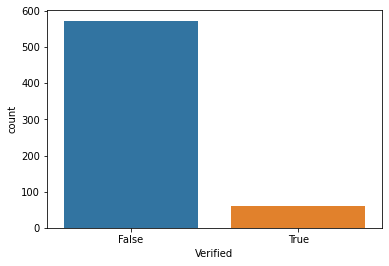

In [35]:
bar = sns.countplot(df['Verified'])

In [36]:
df['Verified'].value_counts()

False    573
True      60
Name: Verified, dtype: int64

In [37]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

thetribunechd      4
INCPunjab          3
MahilaCongress     3
INCIndia           3
IYCPunjab          3
SwarajyaMag        3
TOICitiesNews      3
OpIndia_com        2
TOIChandigarh      2
SevadalHP          2
TheQuint           1
htTweets           1
Sootradhar         1
AnumaVidisha       1
TS_SinghDeo        1
IndianExpress      1
the_hindu          1
ani_digital        1
DeccanHerald       1
pranavINC          1
themojo_in         1
jawharsircar       1
scroll_in          1
thenewsminute      1
ndtv               1
indiatvnews        1
editorji           1
iyctripura         1
BSLaddiOfficial    1
SaralPatel         1
RavneetBittu       1
HardeepSPuri       1
latestly           1
SukhpalKhaira      1
ZeePunjabHH        1
INCWestBengal      1
HindustanTimes     1
firstpost          1
ndtvfeed           1
tarunchughbjp      1
ANI                1
bsindia            1
Name: User, dtype: int64

In [38]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 19, 16: 199, 17: 172, 18: 62, 19: 43, 20: 59, 21: 79})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

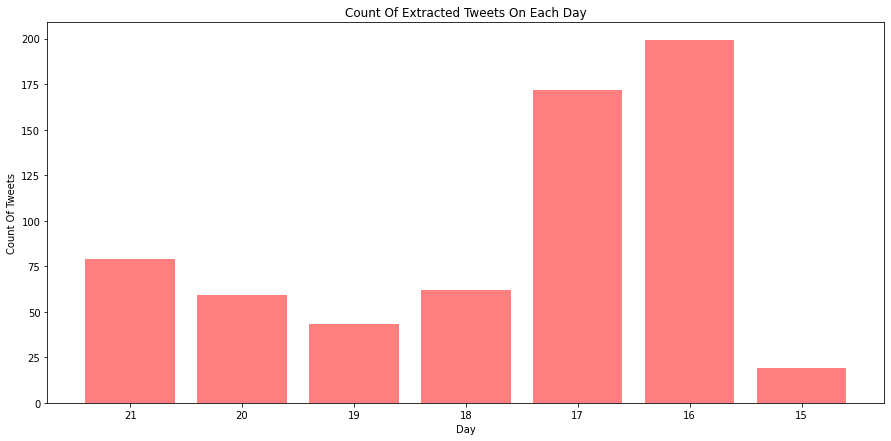

In [39]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [40]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 5,
         1: 13,
         2: 24,
         3: 29,
         4: 39,
         5: 32,
         6: 28,
         7: 16,
         8: 31,
         9: 31,
         10: 51,
         11: 39,
         12: 34,
         13: 51,
         14: 45,
         15: 40,
         16: 41,
         17: 17,
         18: 17,
         19: 19,
         20: 10,
         21: 3,
         22: 7,
         23: 11})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

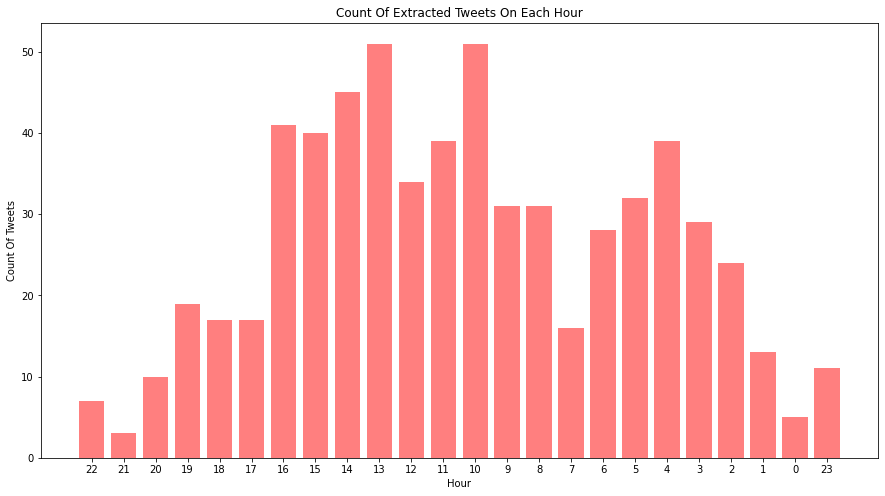

In [41]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [42]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['until', 'but', 'me', 'ain', 'ourselves', 'below', 'through', "didn't", 'mightn', 'we', 'won', 'shouldn', 'hers', 'that', 'into', 'is', 'by', 'up', 'again', "hadn't", 'yourself', 'does', 'have', "wouldn't", 'and', "weren't", 'because', 'did', "you'll", 'the', "aren't", 'here', "mightn't", 'needn', "shan't", 'y', 'on', 'over', 'aren', 'weren', 'further', 'm', "haven't", 'himself', 'its', 'him', 'she', 'theirs', 'just', "needn't", 'these', 'once', "doesn't", 's', "hasn't", 'shan', 'this', 'isn', 'for', 'all', "shouldn't", 'when', 'having', 'those', 'out', 'few', 'doesn', 'only', 'who', 'herself', 've', 'haven', 'such', 'our', 'with', 'in', 'so', 'hadn', 'during', 'hasn', 'nor', 'after', 'off', 'more', 'my', 'itself', 'an', 'of', "won't", 'from', 'do', 'above', 'being', 'has', 'he', 'which', 'your', 'd', 'don', 'before', 'under', 'didn', 'both', 'be', 'a', 'will', 're', 'each', 'most', 'yours', 'own', 'his', 'between', 'to', 'there', "wasn't", 'had', 'or', "isn't", "don't", 'at', 'themse

In [45]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0           bjp non entity punjab says cm amarindersingh
1      heavy duty hard working election machinethey d...
2                                divorce ally smart move
3      present morbidity congress continues v r going...
4      thoko taali khopdi khali laughs like retard no...
                             ...                        
628    mistake kejriwal punjab haryana burning paddy ...
629    k crore school salaries development works talk...
630    rajasthan every years govt changes mp lied far...
631    central act shall passed ban burning stems pad...
632    unfortunately think many people become involve...
Name: Processed_Tweet, Length: 633, dtype: object

In [46]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [bjp, non, entity, punjab, says, cm, amarinder...
1      [heavy, duty, hard, working, election, machine...
2                           [divorce, ally, smart, move]
3      [present, morbidity, congress, continues, v, r...
4      [thoko, taali, khopdi, khali, laughs, like, re...
                             ...                        
628    [mistake, kejriwal, punjab, haryana, burning, ...
629    [k, crore, school, salaries, development, work...
630    [rajasthan, every, years, govt, changes, mp, l...
631    [central, act, shall, passed, ban, burning, st...
632    [unfortunately, think, many, people, become, i...
Name: Processed_Tweet, Length: 633, dtype: object

In [47]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [bjp, non, entiti, punjab, say, cm, amarinders...
1      [heavi, duti, hard, work, elect, machinethey, ...
2                            [divorc, alli, smart, move]
3      [present, morbid, congress, continu, v, r, go,...
4      [thoko, taali, khopdi, khali, laugh, like, ret...
                             ...                        
628    [mistak, kejriw, punjab, haryana, burn, paddi,...
629    [k, crore, school, salari, develop, work, talk...
630    [rajasthan, everi, year, govt, chang, mp, lie,...
631    [central, act, shall, pass, ban, burn, stem, p...
632    [unfortun, think, mani, peopl, becom, involv, ...
Name: Processed_Tweet, Length: 633, dtype: object

In [48]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 22:01:30,1330270135404343296,False,"BJP ‘Non-entity’ in Punjab, Says CM Amarinder ...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, non, entiti, punjab, say, amarindersingh]"
1,2020-11-21 21:29:19,1330262037608476673,False,@BJP4India is only a heavy duty &amp; hard wor...,IamRishabh_tw,"New Delhi, India",Twitter for Android,0,48,173,0,"[heavi, duti, hard, work, elect, machinethey, ..."
2,2020-11-21 20:47:44,1330251572526387210,False,Divorce with ally was a smart move https://t.c...,naashonomics,San Jose,Twitter for iPhone,0,3729,4976,0,"[divorc, alli, smart, move]"
3,2020-11-21 20:14:20,1330243167736782850,False,If the present morbidity on Congress continues...,INDIAisGR8at70,"Pune, India",Twitter for Android,0,1820,2451,0,"[present, morbid, congress, continu, perish, a..."
4,2020-11-21 20:13:46,1330243024220262401,False,@Mohit_ksr @moronhumor How about Thoko Taali k...,MitPatel1977,"Atlanta, GA",Twitter Web App,3,204,157,0,"[thoko, taali, khopdi, khali, laugh, like, ret..."
...,...,...,...,...,...,...,...,...,...,...,...,...
628,2020-11-15 13:38:04,1327969115055722497,False,@jadenyukichandr What is mistake of kejriwal i...,_himanshu__garg,India,Twitter Web App,0,488,300,0,"[mistak, kejriw, punjab, haryana, burn, paddi,..."
629,2020-11-15 13:36:38,1327968756086173697,False,"@jadenyukichandr 50k crore is for school, sala...",_himanshu__garg,India,Twitter Web App,0,488,300,0,"[crore, school, salari, develop, work, talk, p..."
630,2020-11-15 13:28:00,1327966583864528896,False,@Singh2639 @Shehzad_Ind Rajasthan- every 5 yea...,raajeev_t,,Twitter for Android,0,174,536,0,"[rajasthan, everi, year, govt, chang, lie, far..."
631,2020-11-15 13:24:49,1327965783880654851,False,A Central Act shall be passed to ban burning ...,BC13_13Menon,,Twitter Web App,0,1,65,0,"[central, act, shall, pass, ban, burn, stem, p..."


In [49]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

10835

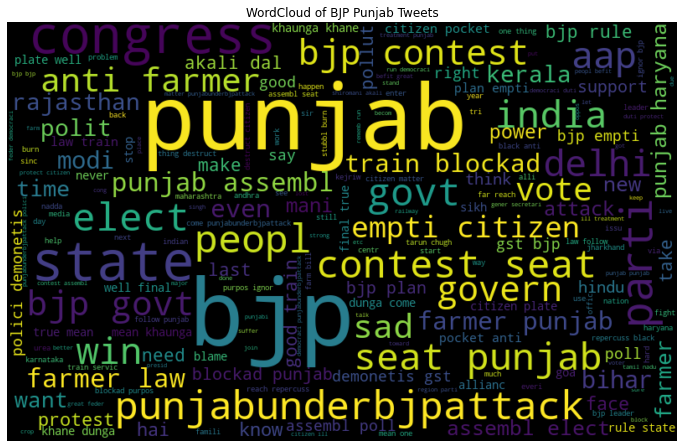

In [50]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of BJP Punjab Tweets")
plt.show()

In [51]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

633

In [52]:
len(text)

10835

In [53]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 269
Negative Tweets: 103
Neutral Tweets 261


In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [56]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.102,0.685,0.212,0.6553
2,0.000,0.526,0.474,0.4019
3,0.043,0.776,0.180,0.6597
4,0.074,0.546,0.380,0.9186
...,...,...,...,...
628,0.253,0.643,0.104,-0.5719
629,0.000,1.000,0.000,0.0000
630,0.078,0.748,0.174,0.4767
631,0.133,0.704,0.163,-0.0516


In [57]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.000,0.0000,Neutral
1,0.102,0.685,0.212,0.6553,Positive
2,0.000,0.526,0.474,0.4019,Positive
3,0.043,0.776,0.180,0.6597,Positive
4,0.074,0.546,0.380,0.9186,Positive


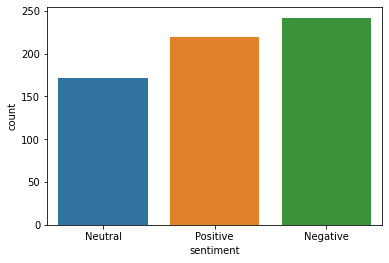

In [58]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [59]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Punjab/bjp_punjab.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

1331

In [60]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [61]:
word_emotion=dict()
for i in range(0,1331):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,3346):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

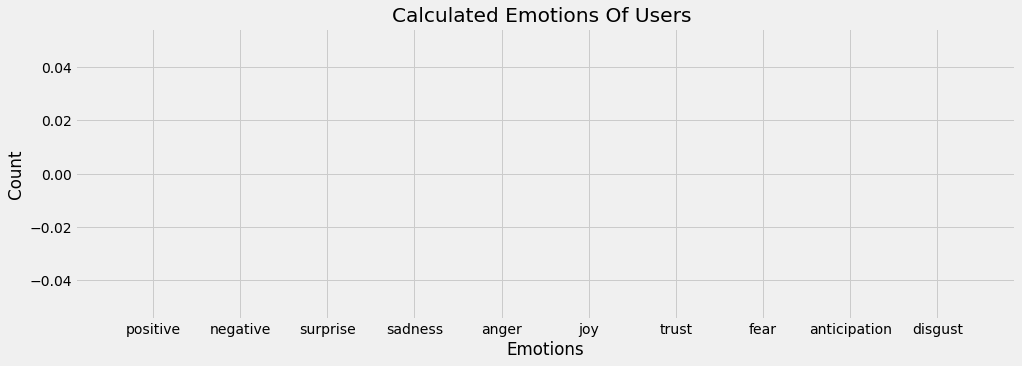

In [62]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [63]:
df.Location  = df.Location.fillna('USA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [64]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                     197
India                 61
New Delhi, India      18
Worldwide             14
Chandigarh, India     13
                    ... 
Arrakis                1
INDIA                  1
Hindustan              1
✨                      1
Phagwara, Punjab       1
Name: Location, Length: 205, dtype: int64

In [65]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 22:01:30,1330270135404343296,False,"BJP ‘Non-entity’ in Punjab, Says CM Amarinder ...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, non, entiti, punjab, say, amarindersingh]",Mumbai
1,2020-11-21 21:29:19,1330262037608476673,False,@BJP4India is only a heavy duty &amp; hard wor...,IamRishabh_tw,"New Delhi, India",Twitter for Android,0,48,173,0,"[heavi, duti, hard, work, elect, machinethey, ...",New Delhi
2,2020-11-21 20:47:44,1330251572526387210,False,Divorce with ally was a smart move https://t.c...,naashonomics,San Jose,Twitter for iPhone,0,3729,4976,0,"[divorc, alli, smart, move]",San Jose
3,2020-11-21 20:14:20,1330243167736782850,False,If the present morbidity on Congress continues...,INDIAisGR8at70,"Pune, India",Twitter for Android,0,1820,2451,0,"[present, morbid, congress, continu, perish, a...",Pune
4,2020-11-21 20:13:46,1330243024220262401,False,@Mohit_ksr @moronhumor How about Thoko Taali k...,MitPatel1977,"Atlanta, GA",Twitter Web App,3,204,157,0,"[thoko, taali, khopdi, khali, laugh, like, ret...",Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2020-11-15 13:38:04,1327969115055722497,False,@jadenyukichandr What is mistake of kejriwal i...,_himanshu__garg,India,Twitter Web App,0,488,300,0,"[mistak, kejriw, punjab, haryana, burn, paddi,...",India
629,2020-11-15 13:36:38,1327968756086173697,False,"@jadenyukichandr 50k crore is for school, sala...",_himanshu__garg,India,Twitter Web App,0,488,300,0,"[crore, school, salari, develop, work, talk, p...",India
630,2020-11-15 13:28:00,1327966583864528896,False,@Singh2639 @Shehzad_Ind Rajasthan- every 5 yea...,raajeev_t,,Twitter for Android,0,174,536,0,"[rajasthan, everi, year, govt, chang, lie, far...",
631,2020-11-15 13:24:49,1327965783880654851,False,A Central Act shall be passed to ban burning ...,BC13_13Menon,,Twitter Web App,0,1,65,0,"[central, act, shall, pass, ban, burn, stem, p...",


In [66]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [67]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 22:01:30,1330270135404343296,False,"BJP ‘Non-entity’ in Punjab, Says CM Amarinder ...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, non, entiti, punjab, say, amarindersingh]",Mumbai,Neutral,21
1,2020-11-21 21:29:19,1330262037608476673,False,@BJP4India is only a heavy duty &amp; hard wor...,IamRishabh_tw,"New Delhi, India",Twitter for Android,0,48,173,0,"[heavi, duti, hard, work, elect, machinethey, ...",New Delhi,Positive,21
2,2020-11-21 20:47:44,1330251572526387210,False,Divorce with ally was a smart move https://t.c...,naashonomics,San Jose,Twitter for iPhone,0,3729,4976,0,"[divorc, alli, smart, move]",San Jose,Positive,21
3,2020-11-21 20:14:20,1330243167736782850,False,If the present morbidity on Congress continues...,INDIAisGR8at70,"Pune, India",Twitter for Android,0,1820,2451,0,"[present, morbid, congress, continu, perish, a...",Pune,Positive,21
4,2020-11-21 20:13:46,1330243024220262401,False,@Mohit_ksr @moronhumor How about Thoko Taali k...,MitPatel1977,"Atlanta, GA",Twitter Web App,3,204,157,0,"[thoko, taali, khopdi, khali, laugh, like, ret...",Atlanta,Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


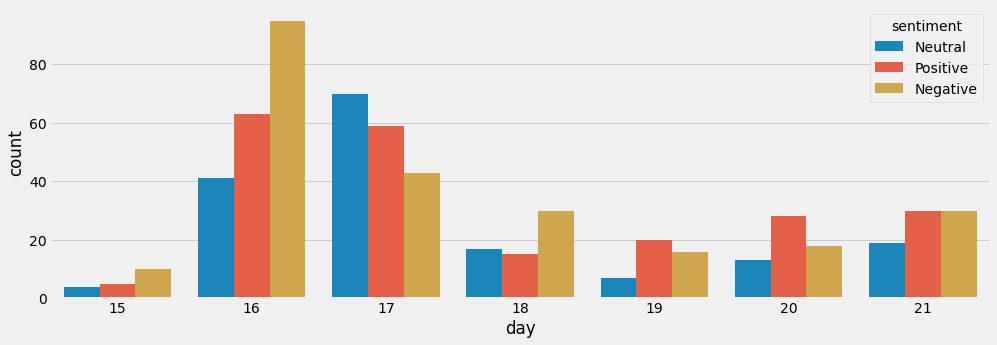

In [68]:
sns.countplot(df['day'],hue = df['sentiment'])

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [70]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 22:01:30,1330270135404343296,False,"BJP ‘Non-entity’ in Punjab, Says CM Amarinder ...",Userskynews18,Mumbai,WordPress.com,0,12,50,0,"[bjp, non, entiti, punjab, say, amarindersingh]",Mumbai,Neutral,21,1
1,2020-11-21 21:29:19,1330262037608476673,False,@BJP4India is only a heavy duty &amp; hard wor...,IamRishabh_tw,"New Delhi, India",Twitter for Android,0,48,173,0,"[heavi, duti, hard, work, elect, machinethey, ...",New Delhi,Positive,21,2
2,2020-11-21 20:47:44,1330251572526387210,False,Divorce with ally was a smart move https://t.c...,naashonomics,San Jose,Twitter for iPhone,0,3729,4976,0,"[divorc, alli, smart, move]",San Jose,Positive,21,2
3,2020-11-21 20:14:20,1330243167736782850,False,If the present morbidity on Congress continues...,INDIAisGR8at70,"Pune, India",Twitter for Android,0,1820,2451,0,"[present, morbid, congress, continu, perish, a...",Pune,Positive,21,2
4,2020-11-21 20:13:46,1330243024220262401,False,@Mohit_ksr @moronhumor How about Thoko Taali k...,MitPatel1977,"Atlanta, GA",Twitter Web App,3,204,157,0,"[thoko, taali, khopdi, khali, laugh, like, ret...",Atlanta,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2020-11-15 13:38:04,1327969115055722497,False,@jadenyukichandr What is mistake of kejriwal i...,_himanshu__garg,India,Twitter Web App,0,488,300,0,"[mistak, kejriw, punjab, haryana, burn, paddi,...",India,Negative,15,0
629,2020-11-15 13:36:38,1327968756086173697,False,"@jadenyukichandr 50k crore is for school, sala...",_himanshu__garg,India,Twitter Web App,0,488,300,0,"[crore, school, salari, develop, work, talk, p...",India,Neutral,15,1
630,2020-11-15 13:28:00,1327966583864528896,False,@Singh2639 @Shehzad_Ind Rajasthan- every 5 yea...,raajeev_t,,Twitter for Android,0,174,536,0,"[rajasthan, everi, year, govt, chang, lie, far...",,Positive,15,2
631,2020-11-15 13:24:49,1327965783880654851,False,A Central Act shall be passed to ban burning ...,BC13_13Menon,,Twitter Web App,0,1,65,0,"[central, act, shall, pass, ban, burn, stem, p...",,Negative,15,0


In [71]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [73]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [74]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [75]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.7210526315789474
Precision Score:  0.7210526315789474
Recall Score:  0.7210526315789474
F1 Score:  0.7210526315789474


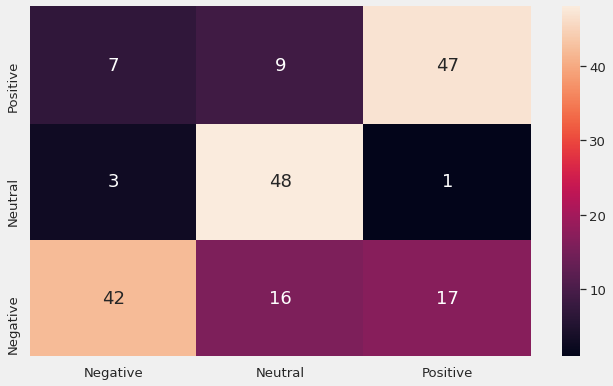

In [76]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [77]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [78]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [79]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5890404040404039
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 9, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [80]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.6105263157894737
Precision Score:  0.6105263157894737
Recall Score:  0.6105263157894737
F1 Score:  0.6105263157894737


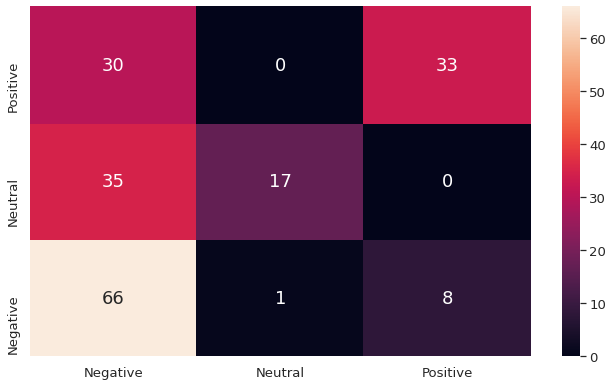

In [81]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [82]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [83]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.7315789473684211
Precision Score:  0.7315789473684211
Recall Score:  0.7315789473684211
F1 Score:  0.731578947368421


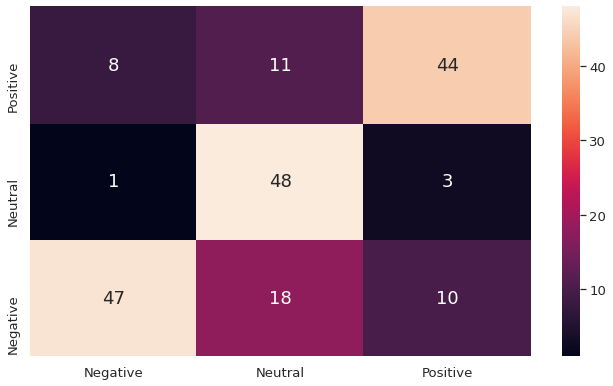

In [84]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [85]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [86]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=800, max_depth=16, criterion=gini ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=800, max_depth=16, criterion=gini, score=0.787, total=   1.7s
[CV] n_estimators=800, max_depth=16, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=800, max_depth=16, criterion=gini, score=0.663, total=   1.7s
[CV] n_estimators=800, max_depth=16, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=800, max_depth=16, criterion=gini, score=0.663, total=   1.7s
[CV] n_estimators=800, max_depth=16, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=800, max_depth=16, criterion=gini, score=0.716, total=   1.7s
[CV] n_estimators=800, max_depth=16, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.8s remaining:    0.0s


[CV]  n_estimators=800, max_depth=16, criterion=gini, score=0.670, total=   1.7s
[CV] n_estimators=300, max_depth=8, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.5s remaining:    0.0s


[CV]  n_estimators=300, max_depth=8, criterion=gini, score=0.730, total=   0.6s
[CV] n_estimators=300, max_depth=8, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    9.0s remaining:    0.0s


[CV]  n_estimators=300, max_depth=8, criterion=gini, score=0.584, total=   0.5s
[CV] n_estimators=300, max_depth=8, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.6s remaining:    0.0s


[CV]  n_estimators=300, max_depth=8, criterion=gini, score=0.607, total=   0.6s
[CV] n_estimators=300, max_depth=8, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.1s remaining:    0.0s


[CV]  n_estimators=300, max_depth=8, criterion=gini, score=0.625, total=   0.5s
[CV] n_estimators=300, max_depth=8, criterion=gini ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.7s remaining:    0.0s


[CV]  n_estimators=300, max_depth=8, criterion=gini, score=0.659, total=   0.6s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.719, total=   2.0s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.607, total=   2.0s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.629, total=   2.0s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.636, total=   2.0s
[CV] n_estimators=1100, max_depth=7, criterion=entropy ...............
[CV]  n_estimators=1100, max_depth=7, criterion=entropy, score=0.648, total=   2.0s
[CV] n_estimators=800, max_depth=8, criterion=entropy ................
[CV]  n_estimators=800, max_depth=8, criterion=entropy, score=0.719, total

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


0.7222420837589377
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [88]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.7263157894736842
Precision Score:  0.7263157894736842
Recall Score:  0.7263157894736842
F1 Score:  0.7263157894736842


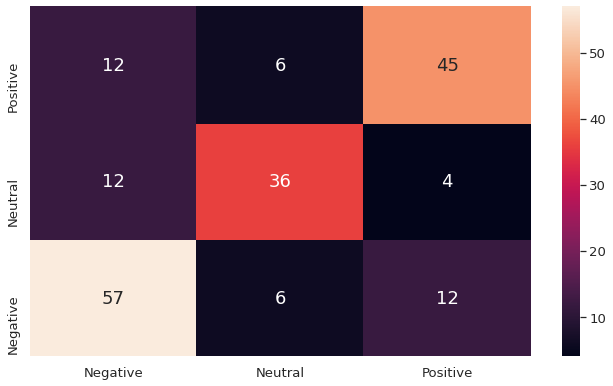

In [89]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [90]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.6947368421052632
Precision Score:  0.6947368421052632
Recall Score:  0.6947368421052632
F1 Score:  0.6947368421052632


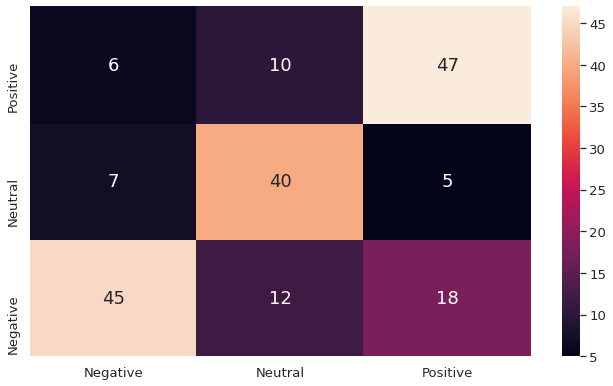

In [91]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [92]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [93]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6498989898989899
{'alpha': 2, 'class_prior': None, 'fit_prior': True}


In [94]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.6526315789473685
Precision Score:  0.6526315789473685
Recall Score:  0.6526315789473685
F1 Score:  0.6526315789473685


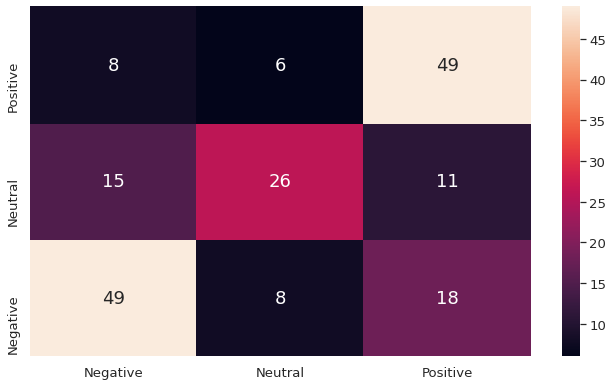

In [95]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

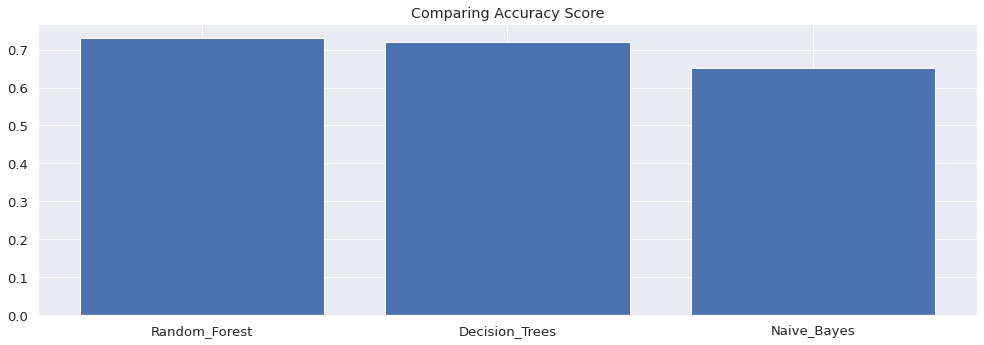

In [96]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

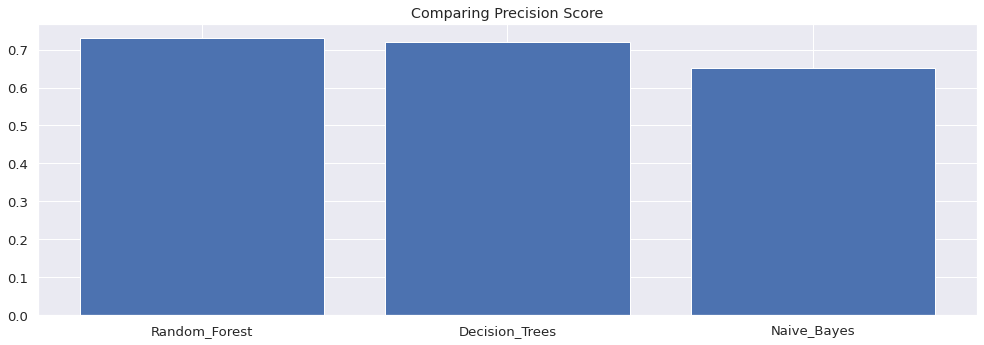

In [97]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

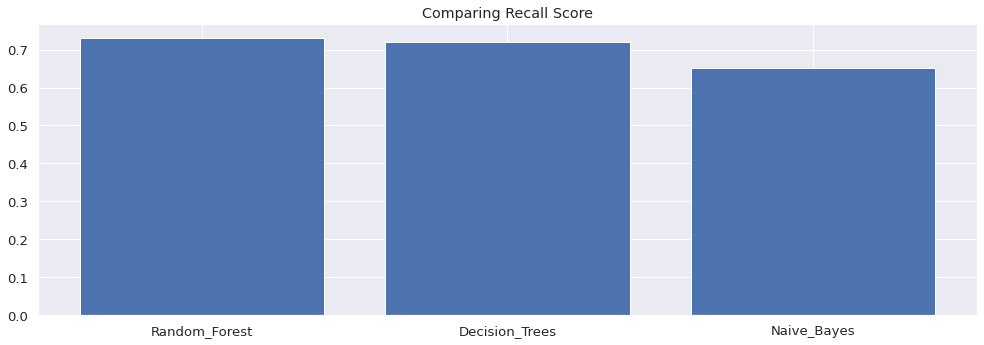

In [98]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

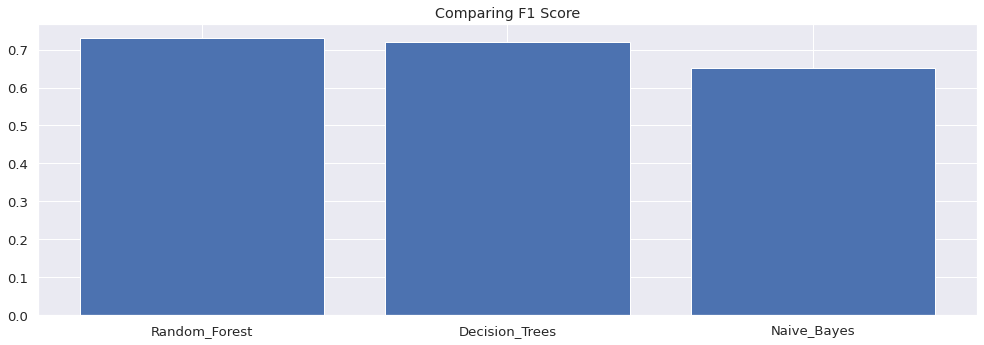

In [100]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()